In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('brain_stroke.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
df['stroke'].unique()

array([1, 0], dtype=int64)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
df['gender'] = df['gender'].replace({'Male':1, 'Female':0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 428.2+ KB


In [6]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,1,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,1,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,0,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,1,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


<AxesSubplot:xlabel='gender'>

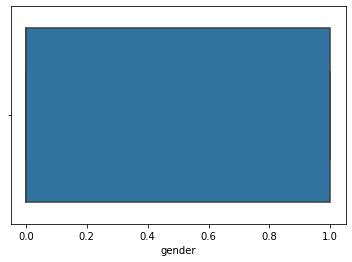

In [7]:
sns.boxplot(x = df['gender'])

<AxesSubplot:xlabel='heart_disease'>

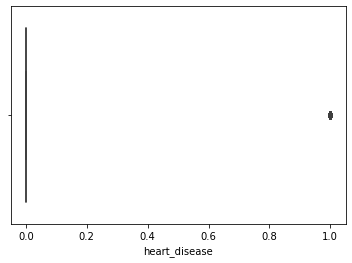

In [8]:
sns.boxplot(x = df['heart_disease'])

<AxesSubplot:>

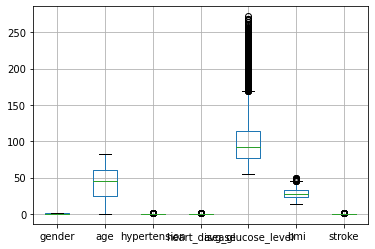

In [9]:
df.boxplot()

# Column 'avg_glucose_level'

In [10]:
q1 = df['avg_glucose_level'].quantile(0.25)
print(q1)
q2 = df['avg_glucose_level'].quantile(0.50)
print(q2)
q3 = df['avg_glucose_level'].quantile(0.75)
print(q3)

iqr = q3 - q1
print(iqr)

lower_tail = q1 + 1.5*iqr
print(lower_tail)

uppar_tail = q3 + 1.5*iqr
print(uppar_tail)

77.23
91.85
113.86
36.629999999999995
132.175
168.805


<AxesSubplot:xlabel='avg_glucose_level'>

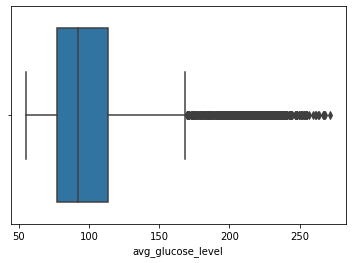

In [11]:
sns.boxplot(x = df['avg_glucose_level'])

<AxesSubplot:xlabel='avg_glucose_level'>

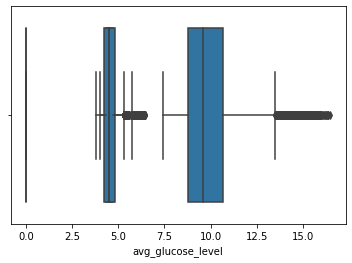

In [12]:
# using trasformation technique

### 1) log transformation                          # still outliers are present
sns.boxplot(x=np.log(df["avg_glucose_level"]))

## cube                                            # still outliers are present
sns.boxplot(x=np.cbrt(df["avg_glucose_level"]))

## square root                                     # still outliers are present 
sns.boxplot(x=np.sqrt(df["avg_glucose_level"]))

# Recipocal                                        # outliers removed
sns.boxplot(x=1/(df["avg_glucose_level"]))

In [13]:
# Recipocal tarsforamtion
df["avg_glucose_level"] =1/(df["avg_glucose_level"])

<AxesSubplot:>

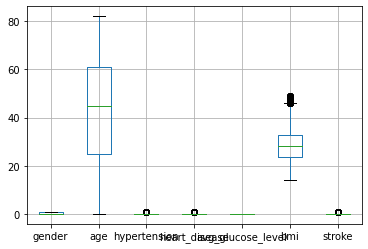

In [14]:
df.boxplot()

# Column 'ever_married'

In [15]:
df['ever_married'].value_counts().to_dict()

{'Yes': 3280, 'No': 1701}

In [16]:
df['ever_married'] = df['ever_married'].replace({'Yes': 0, 'No': 1})

In [17]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,Private,Urban,0.004373,36.6,formerly smoked,1
1,1,80.0,0,1,0,Private,Rural,0.009441,32.5,never smoked,1
2,0,49.0,0,0,0,Private,Urban,0.005840,34.4,smokes,1
3,0,79.0,1,0,0,Self-employed,Rural,0.005743,24.0,never smoked,1
4,1,81.0,0,0,0,Private,Urban,0.005370,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,1,Private,Rural,0.014255,29.8,formerly smoked,0
4977,1,40.0,0,0,0,Private,Urban,0.005231,31.1,smokes,0
4978,0,45.0,1,0,0,Govt_job,Rural,0.010524,31.8,smokes,0
4979,1,40.0,0,0,0,Private,Rural,0.011913,30.0,smokes,0


# Column 'work_type'

In [18]:
df['work_type'].value_counts().to_dict()

{'Private': 2860, 'Self-employed': 804, 'children': 673, 'Govt_job': 644}

In [19]:
df['work_type'] = df['work_type'].replace({'Private': 0, 'Self-employed': 1, 'children': 3, 'Govt_job': 4})

In [20]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,0,Urban,0.004373,36.6,formerly smoked,1
1,1,80.0,0,1,0,0,Rural,0.009441,32.5,never smoked,1
2,0,49.0,0,0,0,0,Urban,0.005840,34.4,smokes,1
3,0,79.0,1,0,0,1,Rural,0.005743,24.0,never smoked,1
4,1,81.0,0,0,0,0,Urban,0.005370,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,1,0,Rural,0.014255,29.8,formerly smoked,0
4977,1,40.0,0,0,0,0,Urban,0.005231,31.1,smokes,0
4978,0,45.0,1,0,0,4,Rural,0.010524,31.8,smokes,0
4979,1,40.0,0,0,0,0,Rural,0.011913,30.0,smokes,0


# Column 'Residence_type'

In [21]:
df['Residence_type'].value_counts().to_dict()

{'Urban': 2532, 'Rural': 2449}

In [22]:
df['Residence_type'] = df['Residence_type'].replace({'Urban': 0, 'Rural': 1})

In [23]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,0,0,0.004373,36.6,formerly smoked,1
1,1,80.0,0,1,0,0,1,0.009441,32.5,never smoked,1
2,0,49.0,0,0,0,0,0,0.005840,34.4,smokes,1
3,0,79.0,1,0,0,1,1,0.005743,24.0,never smoked,1
4,1,81.0,0,0,0,0,0,0.005370,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,1,0,1,0.014255,29.8,formerly smoked,0
4977,1,40.0,0,0,0,0,0,0.005231,31.1,smokes,0
4978,0,45.0,1,0,0,4,1,0.010524,31.8,smokes,0
4979,1,40.0,0,0,0,0,1,0.011913,30.0,smokes,0


# Column 'smoking_status'

In [24]:
df['smoking_status'].value_counts().to_dict()

{'never smoked': 1838, 'Unknown': 1500, 'formerly smoked': 867, 'smokes': 776}

In [25]:
df['smoking_status'] = df['smoking_status'].replace({'never smoked': 1, 'Unknown': 2, 'formerly smoked': 3, 'smokes': 4})

In [26]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,0,0,0.004373,36.6,3,1
1,1,80.0,0,1,0,0,1,0.009441,32.5,1,1
2,0,49.0,0,0,0,0,0,0.005840,34.4,4,1
3,0,79.0,1,0,0,1,1,0.005743,24.0,1,1
4,1,81.0,0,0,0,0,0,0.005370,29.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,1,0,1,0.014255,29.8,3,0
4977,1,40.0,0,0,0,0,0,0.005231,31.1,4,0
4978,0,45.0,1,0,0,4,1,0.010524,31.8,4,0
4979,1,40.0,0,0,0,0,1,0.011913,30.0,4,0


<AxesSubplot:>

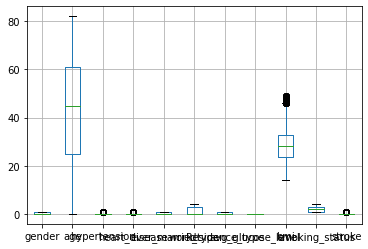

In [27]:
df.boxplot()

# Column 'avg_glucose_level'

In [28]:
df['avg_glucose_level'] = np.log(df['avg_glucose_level'])

In [29]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,0,0,-5.432367,36.6,3,1
1,1,80.0,0,1,0,0,1,-4.662684,32.5,1,1
2,0,49.0,0,0,0,0,0,-5.143008,34.4,4,1
3,0,79.0,1,0,0,1,1,-5.159745,24.0,1,1
4,1,81.0,0,0,0,0,0,-5.226875,29.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,1,0,1,-4.250636,29.8,3,0
4977,1,40.0,0,0,0,0,0,-5.253058,31.1,4,0
4978,0,45.0,1,0,0,4,1,-4.554087,31.8,4,0
4979,1,40.0,0,0,0,0,1,-4.430102,30.0,4,0


<AxesSubplot:>

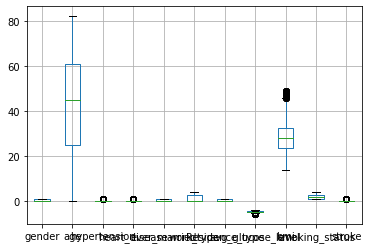

In [30]:
df.boxplot()

<AxesSubplot:xlabel='avg_glucose_level'>

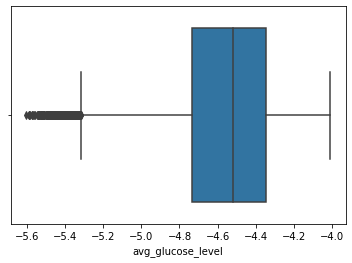

In [31]:
sns.boxplot(x = df['avg_glucose_level'])

In [32]:
x = df.drop('stroke',axis = 1)
y = df.stroke

In [33]:
y.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

## Sampling

In [34]:
from imblearn.over_sampling import RandomOverSampler

In [35]:
random_sampling = RandomOverSampler()
x_sample,y_sample = random_sampling.fit_resample(x,y)
x_sample

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,0,0,0,-5.432367,36.6,3
1,1,80.0,0,1,0,0,1,-4.662684,32.5,1
2,0,49.0,0,0,0,0,0,-5.143008,34.4,4
3,0,79.0,1,0,0,1,1,-5.159745,24.0,1
4,1,81.0,0,0,0,0,0,-5.226875,29.0,3
...,...,...,...,...,...,...,...,...,...,...
9461,1,71.0,0,0,0,0,0,-4.633466,27.2,3
9462,0,68.0,0,0,0,0,1,-5.352142,39.3,2
9463,0,79.0,0,0,1,0,1,-4.487737,22.9,1
9464,0,69.0,0,0,0,4,0,-4.416549,28.0,1


In [36]:
y_sample.value_counts()

1    4733
0    4733
Name: stroke, dtype: int64

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.3, random_state=11, stratify = y_sample)

## Model Training

In [38]:
dt_clf = DecisionTreeClassifier(random_state = 11)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=11)

## Model evaluation

In [39]:
## Training

y_train_pred = dt_clf.predict(x_train)

acc_score = accuracy_score(y_train_pred, y_train)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_train_pred, y_train)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_train_pred, y_train)
print("confusion_matrix : \n",conf_matrix)

Accuracy_score : 
 1.0
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3313
           1       1.00      1.00      1.00      3313

    accuracy                           1.00      6626
   macro avg       1.00      1.00      1.00      6626
weighted avg       1.00      1.00      1.00      6626

confusion_matrix : 
 [[3313    0]
 [   0 3313]]


In [40]:
## testing

y_test_pred = dt_clf.predict(x_test)

acc_score = accuracy_score(y_test_pred, y_test)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_test_pred, y_test)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_test_pred, y_test)
print("confusion_matrix : \n",conf_matrix)                               ## 

Accuracy_score : 
 0.9700704225352113
classification_report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1335
           1       1.00      0.94      0.97      1505

    accuracy                           0.97      2840
   macro avg       0.97      0.97      0.97      2840
weighted avg       0.97      0.97      0.97      2840

confusion_matrix : 
 [[1335    0]
 [  85 1420]]


## hyperparameter Tuning

### Randomized searchcv

In [41]:
df_hyp = DecisionTreeClassifier()

hyperparameter = {"criterion" : ['gini','entropy'],
    "max_depth" : np.arange(2,100),
    "min_samples_split" : np.arange(2,100),
    "min_samples_leaf" : np.arange(2,100)}

rd_model = RandomizedSearchCV(df_hyp,hyperparameter,cv = 5)
rd_model.fit(x_train,y_train)
rd_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=34,
                       min_samples_split=63)

In [42]:
dt_hyp = rd_model.best_estimator_
dt_hyp.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=34,
                       min_samples_split=63)

In [43]:
## Training

y_train_pred = dt_hyp.predict(x_train)

acc_score = accuracy_score(y_train_pred, y_train)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_train_pred, y_train)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_train_pred, y_train)
print("confusion_matrix : \n",conf_matrix)

Accuracy_score : 
 0.861605795351645
classification_report : 
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      3060
           1       0.90      0.84      0.87      3566

    accuracy                           0.86      6626
   macro avg       0.86      0.86      0.86      6626
weighted avg       0.86      0.86      0.86      6626

confusion_matrix : 
 [[2728  332]
 [ 585 2981]]


In [44]:
## testing

y_test_pred = dt_hyp.predict(x_test)

acc_score = accuracy_score(y_test_pred, y_test)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_test_pred, y_test)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_test_pred, y_test)
print("confusion_matrix : \n",conf_matrix)                               ## 

Accuracy_score : 
 0.844718309859155
classification_report : 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84      1267
           1       0.90      0.81      0.85      1573

    accuracy                           0.84      2840
   macro avg       0.84      0.85      0.84      2840
weighted avg       0.85      0.84      0.85      2840

confusion_matrix : 
 [[1123  144]
 [ 297 1276]]


## Pruning


In [45]:
dt_clf = DecisionTreeClassifier(random_state=13)

In [46]:
ccp_dict = dt_clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas = ccp_dict['ccp_alphas']
ccp_alphas

array([0.00000000e+00, 1.44632257e-04, 1.46481774e-04, 1.46608598e-04,
       1.47327268e-04, 1.47902203e-04, 1.48272886e-04, 1.48362639e-04,
       1.48525050e-04, 1.48525050e-04, 1.48668069e-04, 1.48701195e-04,
       1.48960608e-04, 1.48960608e-04, 1.49034108e-04, 1.49185896e-04,
       1.49536023e-04, 1.94839313e-04, 1.96067809e-04, 2.58721056e-04,
       2.58721056e-04, 2.71657108e-04, 2.75363931e-04, 2.76927352e-04,
       2.79203139e-04, 2.80063365e-04, 2.80281144e-04, 2.80409477e-04,
       2.80949673e-04, 2.81024595e-04, 2.81718483e-04, 2.82933293e-04,
       2.83133364e-04, 2.83340096e-04, 2.84204234e-04, 2.85072274e-04,
       2.85954851e-04, 2.86749170e-04, 2.87467840e-04, 2.87767285e-04,
       2.88573485e-04, 2.88996924e-04, 2.89300355e-04, 2.89767582e-04,
       2.89767582e-04, 2.90282210e-04, 2.90989018e-04, 2.91061188e-04,
       2.91061188e-04, 2.91432913e-04, 2.91432913e-04, 2.92025257e-04,
       2.92104418e-04, 2.92104418e-04, 2.93456753e-04, 2.93683360e-04,
      

In [47]:
r2_score_train_list = []
r2_score_test_list =  []

for ccp in ccp_alphas:
    dt_clf_pruning = DecisionTreeClassifier(random_state=15,ccp_alpha=ccp)
    dt_clf_pruning.fit(x_train,y_train)
    r2_score_train = dt_clf_pruning.score(x_train,y_train)
    r2_score_test = dt_clf_pruning.score(x_test,y_test)
    r2_score_train_list.append(r2_score_train)
    r2_score_test_list.append(r2_score_test)
    print(ccp,r2_score_train,r2_score_test)

0.0 1.0 0.9690140845070423
0.00014463225676627437 0.9998490793842438 0.9690140845070423
0.0001464817741162266 0.9996981587684878 0.9690140845070423
0.0001466085981630805 0.9995472381527316 0.9690140845070423
0.00014732726776191908 0.9993963175369756 0.9690140845070423
0.0001479022034409901 0.9992453969212194 0.9690140845070423
0.0001482728856551279 0.9990944763054633 0.9690140845070423
0.00014836263921787316 0.9989435556897072 0.9690140845070423
0.00014852505042665026 0.9986417144581949 0.9690140845070423
0.00014852505042665026 0.9986417144581949 0.9690140845070423
0.00014866806925228955 0.9984907938424389 0.9690140845070423
0.0001487011949361696 0.9983398732266827 0.9690140845070423
0.00014896060775927955 0.9980380319951705 0.9686619718309859
0.00014896060775927955 0.9980380319951705 0.9686619718309859
0.00014903410805916072 0.9978871113794144 0.9686619718309859
0.00014918589603477736 0.9977361907636583 0.9683098591549296
0.0001495360229510105 0.9975852701479022 0.9683098591549296
0.0

0.001574173889296135 0.8854512526411108 0.8753521126760564
0.001590268124227808 0.880319951705403 0.8686619718309859
0.0016480635383603042 0.8780561424690613 0.8672535211267606
0.0016494484278627933 0.8751886507696951 0.8623239436619718
0.001660126773317235 0.8739812858436462 0.8619718309859155
0.001731148239555406 0.8720193178388168 0.8591549295774648
0.0017771684030345434 0.8638696045879867 0.8538732394366197
0.0018232157804738292 0.8607002716571084 0.8514084507042253
0.001852962160085613 0.8564744944159373 0.846830985915493
0.001857162021665493 0.8545125264111078 0.8454225352112676
0.0018908653587001167 0.8505885904014489 0.842605633802817
0.0019115640153973992 0.8492303048596438 0.8419014084507043
0.001957969678014003 0.8459100513130093 0.8397887323943662
0.001968604783505677 0.8421370359191066 0.8366197183098592
0.001979394601738845 0.8370057349833987 0.829225352112676
0.002155952163343435 0.8353456082100815 0.8302816901408451
0.0022065299373722064 0.833232719589496 0.829225352112

In [48]:
max(r2_score_test_list)

0.9690140845070423

In [49]:
np.where(r2_score_test_list == max(r2_score_test_list))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64),)

In [50]:
np.where(r2_score_test_list  == max(r2_score_test_list))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64),)

In [51]:
r2_score_train_list[1]

0.9998490793842438

In [52]:
ccp_alphas[1]

0.00014463225676627437

In [53]:
dt_clf_after_prun = DecisionTreeClassifier(random_state=16,ccp_alpha=0.00014373391976772604)
dt_clf_after_prun.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00014373391976772604, random_state=16)

In [54]:
## Training

y_train_pred = dt_clf_after_prun.predict(x_train)

acc_score = accuracy_score(y_train_pred, y_train)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_train_pred, y_train)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_train_pred, y_train)
print("confusion_matrix : \n",conf_matrix)

Accuracy_score : 
 1.0
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3313
           1       1.00      1.00      1.00      3313

    accuracy                           1.00      6626
   macro avg       1.00      1.00      1.00      6626
weighted avg       1.00      1.00      1.00      6626

confusion_matrix : 
 [[3313    0]
 [   0 3313]]


In [55]:
## testing

y_test_pred = dt_clf_after_prun.predict(x_test)

acc_score = accuracy_score(y_test_pred, y_test)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_test_pred, y_test)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_test_pred, y_test)
print("confusion_matrix : \n",conf_matrix)                               ## 

Accuracy_score : 
 0.9693661971830986
classification_report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1333
           1       1.00      0.94      0.97      1507

    accuracy                           0.97      2840
   macro avg       0.97      0.97      0.97      2840
weighted avg       0.97      0.97      0.97      2840

confusion_matrix : 
 [[1333    0]
 [  87 1420]]


In [56]:
dt_clf_after_prun.feature_importances_

array([0.01446534, 0.45052801, 0.02031797, 0.01283506, 0.00735101,
       0.01847562, 0.00877862, 0.2319313 , 0.18788373, 0.04743334])

In [57]:
df1 = df[['age','avg_glucose_level','bmi']]
df1['stroke'] = df['stroke']
 

C:\Users\hp\AppData\Local\Temp\ipykernel_18168\3548273936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['stroke'] = df['stroke']


In [58]:
df1

,age,avg_glucose_level,bmi,stroke
0,67.0,-5.432367,36.6,1
1,80.0,-4.662684,32.5,1
2,49.0,-5.143008,34.4,1
3,79.0,-5.159745,24.0,1
4,81.0,-5.226875,29.0,1
...,...,...,...,...
4976,41.0,-4.250636,29.8,0
4977,40.0,-5.253058,31.1,0
4978,45.0,-4.554087,31.8,0
4979,40.0,-4.430102,30.0,0


In [59]:
x = df1.drop('stroke',axis = 1)
y = df1.stroke

In [60]:
y.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

## Sampling

In [61]:
from imblearn.over_sampling import RandomOverSampler

In [62]:
random_sampling = RandomOverSampler()
x_sample,y_sample = random_sampling.fit_resample(x,y)
x_sample

,age,avg_glucose_level,bmi
0,67.0,-5.432367,36.6
1,80.0,-4.662684,32.5
2,49.0,-5.143008,34.4
3,79.0,-5.159745,24.0
4,81.0,-5.226875,29.0
...,...,...,...
9461,71.0,-4.475062,30.8
9462,70.0,-5.400784,47.5
9463,63.0,-4.922168,31.7
9464,39.0,-4.582515,29.6


In [63]:
y_sample.value_counts()

1    4733
0    4733
Name: stroke, dtype: int64

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.3, random_state=11, stratify = y_sample)

## Model Training

In [65]:
dt_clf = DecisionTreeClassifier(random_state = 11)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=11)

## Model evaluation

In [66]:
## Training

y_train_pred = dt_clf.predict(x_train)

acc_score = accuracy_score(y_train_pred, y_train)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_train_pred, y_train)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_train_pred, y_train)
print("confusion_matrix : \n",conf_matrix)

Accuracy_score : 
 1.0
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3313
           1       1.00      1.00      1.00      3313

    accuracy                           1.00      6626
   macro avg       1.00      1.00      1.00      6626
weighted avg       1.00      1.00      1.00      6626

confusion_matrix : 
 [[3313    0]
 [   0 3313]]


In [67]:
## testing

y_test_pred = dt_clf.predict(x_test)

acc_score = accuracy_score(y_test_pred, y_test)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_test_pred, y_test)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_test_pred, y_test)
print("confusion_matrix : \n",conf_matrix)                               ## 

Accuracy_score : 
 0.971830985915493
classification_report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1340
           1       1.00      0.95      0.97      1500

    accuracy                           0.97      2840
   macro avg       0.97      0.97      0.97      2840
weighted avg       0.97      0.97      0.97      2840

confusion_matrix : 
 [[1340    0]
 [  80 1420]]


## hyperparameter Tuning

### Randomized searchcv

In [68]:
df_hyp = DecisionTreeClassifier()

hyperparameter = {"criterion" : ['gini','entropy'],
    "max_depth" : np.arange(2,100),
    "min_samples_split" : np.arange(2,100),
    "min_samples_leaf" : np.arange(2,100)}

rd_model = RandomizedSearchCV(df_hyp,hyperparameter,cv = 5)
rd_model.fit(x_train,y_train)
rd_model.best_estimator_

DecisionTreeClassifier(max_depth=24, min_samples_leaf=24, min_samples_split=19)

In [69]:
dt_hyp = rd_model.best_estimator_
dt_hyp.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=24, min_samples_leaf=24, min_samples_split=19)

In [70]:
## Training

y_train_pred = dt_hyp.predict(x_train)

acc_score = accuracy_score(y_train_pred, y_train)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_train_pred, y_train)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_train_pred, y_train)
print("confusion_matrix : \n",conf_matrix)

Accuracy_score : 
 0.8769996981587684
classification_report : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      3078
           1       0.91      0.85      0.88      3548

    accuracy                           0.88      6626
   macro avg       0.88      0.88      0.88      6626
weighted avg       0.88      0.88      0.88      6626

confusion_matrix : 
 [[2788  290]
 [ 525 3023]]


In [71]:
## testing

y_test_pred = dt_hyp.predict(x_test)

acc_score = accuracy_score(y_test_pred, y_test)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_test_pred, y_test)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_test_pred, y_test)
print("confusion_matrix : \n",conf_matrix)                               ## 

Accuracy_score : 
 0.8672535211267606
classification_report : 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1295
           1       0.91      0.84      0.87      1545

    accuracy                           0.87      2840
   macro avg       0.87      0.87      0.87      2840
weighted avg       0.87      0.87      0.87      2840

confusion_matrix : 
 [[1169  126]
 [ 251 1294]]


## Pruning


In [72]:
dt_clf = DecisionTreeClassifier(random_state=13)

In [73]:
ccp_dict = dt_clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas = ccp_dict['ccp_alphas']
ccp_alphas

array([0.00000000e+00, 1.42977425e-04, 1.44358850e-04, 1.44883791e-04,
       1.45115977e-04, 1.45330963e-04, 1.45330963e-04, 1.45716457e-04,
       1.46204347e-04, 1.46347264e-04, 1.46759202e-04, 1.47050856e-04,
       1.47224345e-04, 1.47239625e-04, 1.47840603e-04, 1.47961388e-04,
       1.48489822e-04, 1.48633940e-04, 1.48733360e-04, 1.48934818e-04,
       1.49262147e-04, 1.49331978e-04, 2.15297992e-04, 2.33287460e-04,
       2.59135673e-04, 2.64657891e-04, 2.65065173e-04, 2.67477768e-04,
       2.68303317e-04, 2.68303317e-04, 2.68303317e-04, 2.69900360e-04,
       2.71041106e-04, 2.71657108e-04, 2.71657108e-04, 2.76912380e-04,
       2.79356833e-04, 2.79396627e-04, 2.80456429e-04, 2.81718483e-04,
       2.81718483e-04, 2.81718483e-04, 2.82283152e-04, 2.82976155e-04,
       2.82976155e-04, 2.83575361e-04, 2.84085865e-04, 2.85072274e-04,
       2.85072274e-04, 2.85211538e-04, 2.86749170e-04, 2.87692424e-04,
       2.88121176e-04, 2.88394211e-04, 2.88717700e-04, 2.89767582e-04,
      

In [74]:
r2_score_train_list = []
r2_score_test_list =  []

for ccp in ccp_alphas:
    dt_clf_pruning = DecisionTreeClassifier(random_state=15,ccp_alpha=ccp)
    dt_clf_pruning.fit(x_train,y_train)
    r2_score_train = dt_clf_pruning.score(x_train,y_train)
    r2_score_test = dt_clf_pruning.score(x_test,y_test)
    r2_score_train_list.append(r2_score_train)
    r2_score_test_list.append(r2_score_test)
    print(ccp,r2_score_train,r2_score_test)

0.0 1.0 0.9742957746478873
0.00014297742545315908 0.9998490793842438 0.973943661971831
0.00014435884985367265 0.9996981587684878 0.9732394366197183
0.00014488379112586775 0.9995472381527316 0.972887323943662
0.0001451159766885696 0.9993963175369756 0.972887323943662
0.00014533096332070065 0.9990944763054633 0.9725352112676057
0.00014533096332070065 0.9990944763054633 0.9725352112676057
0.0001457164565921083 0.9989435556897072 0.9721830985915493
0.0001462043465137338 0.9987926350739511 0.971830985915493
0.00014634726376350272 0.9986417144581949 0.971830985915493
0.0001467592017187194 0.9984907938424389 0.9714788732394366
0.0001470508563777503 0.9983398732266827 0.9711267605633803
0.00014722434496756517 0.9981889526109267 0.9707746478873239
0.00014723962512791448 0.9980380319951705 0.9707746478873239
0.00014784060318966108 0.9978871113794144 0.9707746478873239
0.0001479613879961887 0.9977361907636583 0.9707746478873239
0.00014848982152474628 0.9975852701479022 0.9704225352112676
0.000148

0.0014266801899155753 0.8795653486266224 0.8598591549295774
0.0014321317254503807 0.8785089043163297 0.8591549295774648
0.001464631929186643 0.8757923332327195 0.8566901408450704
0.0014656480225195504 0.8754904920012073 0.8573943661971831
0.0014775094267000313 0.8706610322970117 0.8535211267605634
0.0014820841918310387 0.869604587986719 0.8528169014084507
0.0014956418504127635 0.8661334138243284 0.8503521126760564
0.0016347765974903282 0.8614548747358889 0.8471830985915493
0.0016348798012598502 0.8552671294898884 0.8411971830985916
0.0016787882770375974 0.8530033202535466 0.8348591549295775
0.0017459393297893245 0.8511922728644733 0.8334507042253522
0.0017796695435376131 0.8483247811651071 0.8302816901408451
0.0018141768539259471 0.8445517657712044 0.8264084507042253
0.0018225073666861876 0.8401750679142771 0.8221830985915493
0.0018389096565975542 0.8392695442197404 0.821830985915493
0.0018862451401301823 0.8326290371264715 0.8165492957746479
0.0019044008458809283 0.8296106248113493 0.

In [75]:
max(r2_score_test_list)

0.9742957746478873

In [76]:
np.where(r2_score_test_list == max(r2_score_test_list))

(array([0], dtype=int64),)

In [77]:
np.where(r2_score_test_list  == max(r2_score_test_list))

(array([0], dtype=int64),)

In [78]:
r2_score_train_list[1]

0.9998490793842438

In [79]:
ccp_alphas[1]

0.00014297742545315908

In [80]:
dt_clf_after_prun = DecisionTreeClassifier(random_state=16,ccp_alpha=0.00014373391976772604)
dt_clf_after_prun.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00014373391976772604, random_state=16)

In [81]:
## Training

y_train_pred = dt_clf_after_prun.predict(x_train)

acc_score = accuracy_score(y_train_pred, y_train)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_train_pred, y_train)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_train_pred, y_train)
print("confusion_matrix : \n",conf_matrix)

Accuracy_score : 
 0.9998490793842438
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3312
           1       1.00      1.00      1.00      3314

    accuracy                           1.00      6626
   macro avg       1.00      1.00      1.00      6626
weighted avg       1.00      1.00      1.00      6626

confusion_matrix : 
 [[3312    0]
 [   1 3313]]


In [82]:
## testing

y_test_pred = dt_clf_after_prun.predict(x_test)

acc_score = accuracy_score(y_test_pred, y_test)
print("Accuracy_score : \n",acc_score)

clf_report = classification_report(y_test_pred, y_test)
print("classification_report : \n",clf_report)

conf_matrix = confusion_matrix(y_test_pred, y_test)
print("confusion_matrix : \n",conf_matrix)                               ## 

Accuracy_score : 
 0.9725352112676057
classification_report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1342
           1       1.00      0.95      0.97      1498

    accuracy                           0.97      2840
   macro avg       0.97      0.97      0.97      2840
weighted avg       0.97      0.97      0.97      2840

confusion_matrix : 
 [[1342    0]
 [  78 1420]]
